In [35]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import warnings
#warnings.filterwarnings("ignore", category=DeprecationWarning)


In [36]:
df=pd.read_csv('all_IS10_IEMOCAP_4.csv')

In [37]:
X=df.drop('label',axis='columns')


In [38]:
y=df.label


In [39]:
X_new=np.array(X)


In [40]:
y_new=np.array(y)

In [41]:
import random
#print("Original NumPy Array:")
#print(X_new)

# Create a new array for noisy data
X_new_noisy = np.copy(X_new)

# Add random noise to each element
for i in range(X_new.shape[0]):
    for j in range(X_new.shape[1]):
        X_new_noisy[i, j] += random.uniform(0.1, 0.12)

# Display the NumPy array with added random noise
#print("\nNumPy Array with Added Noise:")
#print(X_new_noisy)

In [42]:
X_new_noisy.shape

(5531, 1582)

In [43]:
y_new.shape

(5531,)

In [44]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scale=scaler.fit_transform(X_new_noisy)

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scale,y_new,test_size=0.25,random_state=4)

In [30]:
len(X_train)

4148

In [31]:
len(y_train)

4148

In [32]:
X_train.shape

(4148, 1582)

In [33]:
y_train.shape

(4148,)

In [16]:
y_train[:5]

array([2, 2, 0, 2, 0], dtype=int64)

# Implementing the sequential neural network

In [48]:
from keras.models import Sequential
from keras.layers import Dense


In [49]:
num_classes = np.max(y_train) + 1  

# Step 3: Creating  model
models = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')  # Using softmax for multi-class classification
])

# Step 4: Compiling the model with sparse categorical cross-entropy loss
models.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [50]:
models.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)


Epoch 1/10
130/130 [==============================] - 2s 5ms/step - loss: 1.0195 - accuracy: 0.5632
Epoch 2/10
130/130 [==============================] - 1s 4ms/step - loss: 0.7026 - accuracy: 0.7155
Epoch 3/10
130/130 [==============================] - 0s 3ms/step - loss: 0.5343 - accuracy: 0.7980
Epoch 4/10
130/130 [==============================] - 0s 3ms/step - loss: 0.3845 - accuracy: 0.8611
Epoch 5/10
130/130 [==============================] - 0s 3ms/step - loss: 0.2726 - accuracy: 0.9132
Epoch 6/10
130/130 [==============================] - 0s 3ms/step - loss: 0.1882 - accuracy: 0.9455
Epoch 7/10
130/130 [==============================] - 0s 3ms/step - loss: 0.1270 - accuracy: 0.9672
Epoch 8/10
130/130 [==============================] - 0s 3ms/step - loss: 0.0778 - accuracy: 0.9860
Epoch 9/10
130/130 [==============================] - 0s 3ms/step - loss: 0.0463 - accuracy: 0.9913
Epoch 10/10
130/130 [==============================] - 0s 3ms/step - loss: 0.0304 - accuracy: 0.9959

In [59]:
accuracy=models.evaluate(X_test,y_test)
accuracy

44/44 [==============================] - 0s 2ms/step - loss: 1.4444 - accuracy: 0.6327


[1.4444125890731812, 0.6326825618743896]

In [60]:
y_pred_prob=models.predict(np.array(X_test))

44/44 [==============================] - 0s 2ms/step


In [61]:
y_pred_prob.shape

(1383, 4)

In [30]:
y_pred=np.argmax(y_pred_prob,axis=1)

In [25]:
y_test_binary=np.array(y_test)

In [ ]:
y_test_binary.shape

# Confusion Matrix

In [35]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

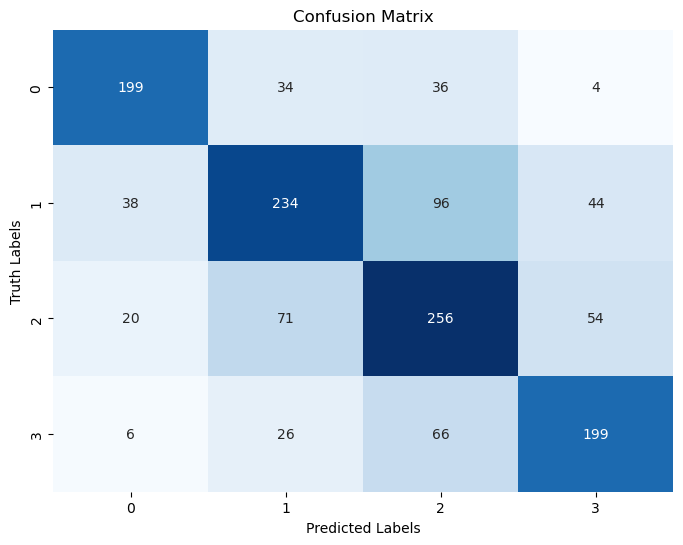

In [36]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Truth Labels')
plt.title('Confusion Matrix')
plt.show()

In [40]:
y_pred=np.round(y_pred)
print("Classification Report: \n", classification_report(y_test, y_pred))
    
#return y_pred

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.73      0.74       273
           1       0.64      0.57      0.60       412
           2       0.56      0.64      0.60       401
           3       0.66      0.67      0.67       297

    accuracy                           0.64      1383
   macro avg       0.66      0.65      0.65      1383
weighted avg       0.65      0.64      0.64      1383



# Sequential network with adjusting the weights

In [78]:
def SNN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(64, input_dim=X_train.shape[1], activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
         model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(history.evaluate(X_test, y_test))
    

In [79]:
y_preds = model.predict(np.array(X_test))
y_preds = np.argmax(y_preds, axis=1)
y_preds = np.round(y_preds)

print("Classification Report: \n", classification_report(y_test, y_preds))

44/44 [==============================] - 0s 3ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.66      0.69       273
           1       0.60      0.62      0.61       412
           2       0.59      0.60      0.59       401
           3       0.66      0.68      0.67       297

    accuracy                           0.64      1383
   macro avg       0.65      0.64      0.64      1383
weighted avg       0.64      0.64      0.64      1383



# DROPOUT REGULARIZATION

#No dropout layer

In [51]:
num_classes = np.max(y_train) + 1  


model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')  
])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)


Epoch 1/10
130/130 [==============================] - 1s 3ms/step - loss: 1.0449 - accuracy: 0.5497
Epoch 2/10
130/130 [==============================] - 0s 3ms/step - loss: 0.7060 - accuracy: 0.7172
Epoch 3/10
130/130 [==============================] - 0s 3ms/step - loss: 0.5467 - accuracy: 0.7946
Epoch 4/10
130/130 [==============================] - 0s 3ms/step - loss: 0.3994 - accuracy: 0.8667
Epoch 5/10
130/130 [==============================] - 1s 4ms/step - loss: 0.2719 - accuracy: 0.9144
Epoch 6/10
130/130 [==============================] - 1s 5ms/step - loss: 0.1872 - accuracy: 0.9491
Epoch 7/10
130/130 [==============================] - 1s 4ms/step - loss: 0.1319 - accuracy: 0.9655
Epoch 8/10
130/130 [==============================] - 1s 5ms/step - loss: 0.0743 - accuracy: 0.9877
Epoch 9/10
130/130 [==============================] - 1s 5ms/step - loss: 0.0438 - accuracy: 0.9935
Epoch 10/10
130/130 [==============================] - 0s 4ms/step - loss: 0.0220 - accuracy: 0.9988

In [52]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 1.4584 - accuracy: 0.6500


[1.4583524465560913, 0.6500361561775208]

In [53]:
y_pred=model.predict(X_test).reshape(-1)
print(y_pred[:10])

y_pred=np.round(y_pred)
print(y_pred[:10])

44/44 [==============================] - 0s 2ms/step
[3.35627317e-01 6.64269328e-01 9.09058217e-05 1.24736935e-05
 2.95903180e-02 1.36026919e-01 5.62276125e-01 2.72106707e-01
 8.25740926e-07 1.01697827e-02]
[0. 1. 0. 0. 0. 0. 1. 0. 0. 0.]


In [54]:
y_test[:10]

array([1, 3, 3, 1, 3, 3, 3, 2, 3, 2], dtype=int64)

# MODEL WITH DROPOUT LAYER

In [55]:
num_classes = np.max(y_train) + 1 
modeld=keras.Sequential([
    keras.layers.Dense(60,input_shape=(X_train.shape[1],),activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_classes,activation='sigmoid')
    
])

modeld.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

modeld.fit(X_train,y_train,epochs=10,batch_size=8)

Epoch 1/10
519/519 [==============================] - 3s 3ms/step - loss: 1.6931 - accuracy: 0.3054
Epoch 2/10
519/519 [==============================] - 2s 3ms/step - loss: 1.3342 - accuracy: 0.3619
Epoch 3/10
519/519 [==============================] - 2s 4ms/step - loss: 1.2591 - accuracy: 0.4113
Epoch 4/10
519/519 [==============================] - 2s 4ms/step - loss: 1.2204 - accuracy: 0.4412
Epoch 5/10
519/519 [==============================] - 2s 3ms/step - loss: 1.1707 - accuracy: 0.4499
Epoch 6/10
519/519 [==============================] - 2s 3ms/step - loss: 1.1590 - accuracy: 0.4491
Epoch 7/10
519/519 [==============================] - 2s 3ms/step - loss: 1.1363 - accuracy: 0.4785
Epoch 8/10
519/519 [==============================] - 2s 3ms/step - loss: 1.0852 - accuracy: 0.4988
Epoch 9/10
519/519 [==============================] - 2s 3ms/step - loss: 1.1161 - accuracy: 0.4759
Epoch 10/10
519/519 [==============================] - 2s 3ms/step - loss: 1.0730 - accuracy: 0.5024

In [31]:
accuracy=modeld.evaluate(X_test,y_test)

44/44 [==============================] - 0s 6ms/step - loss: 1.0531 - accuracy: 0.5083


In [32]:
y_pred=modeld.predict(np.array(X_test))

44/44 [==============================] - 0s 2ms/step


In [33]:
y_pred=np.argmax(y_pred,axis=1)

# Classification Report

In [62]:
y_pred = np.round(y_pred)

print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.64      0.66       273
           1       0.54      0.30      0.39       412
           2       0.47      0.72      0.57       401
           3       0.65      0.65      0.65       297

    accuracy                           0.56      1383
   macro avg       0.59      0.58      0.57      1383
weighted avg       0.58      0.56      0.55      1383



# Implementing Convolution Neural Network

In [56]:
def CNN(X_train, y_train, X_test, y_test, loss, weights):
    num_classes = y_train.shape[1]  
    model = keras.Sequential([
        keras.layers.Conv1D(32, kernel_size=(3, 3), activation='relu', input_dim=X_train.shape[1]),
        keras.layers.MaxPooling1D(pool_size=(2, 2)),
        keras.layers.Conv1D(64, kernel_size=(3, 3), activation='relu'),
        keras.layers.MaxPooling1D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight=weights)
    
    


In [57]:
accuracy=model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 1.4584 - accuracy: 0.6500


In [83]:
y_pred=model.predict(X_test)
y_pred[:5]

44/44 [==============================] - 0s 3ms/step


array([[2.5210865e-03, 9.9747616e-01, 1.5278690e-06, 1.1391435e-06],
       [1.5437121e-05, 5.9009904e-01, 2.3570935e-01, 1.7417611e-01],
       [4.2813266e-08, 1.6246558e-03, 4.3541739e-05, 9.9833184e-01],
       [2.0960958e-06, 9.9966979e-01, 2.7824508e-04, 4.9965442e-05],
       [2.3320687e-05, 1.4358283e-03, 1.4298588e-02, 9.8424238e-01]],
      dtype=float32)

In [67]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[1, 1, 3, 1, 3]

In [68]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([1, 3, 3, 1, 3], dtype=int64)

In [69]:
print("classification report",classification_report(y_test,y_classes))

classification report               precision    recall  f1-score   support

           0       0.73      0.66      0.69       273
           1       0.60      0.62      0.61       412
           2       0.59      0.60      0.59       401
           3       0.66      0.68      0.67       297

    accuracy                           0.64      1383
   macro avg       0.65      0.64      0.64      1383
weighted avg       0.64      0.64      0.64      1383



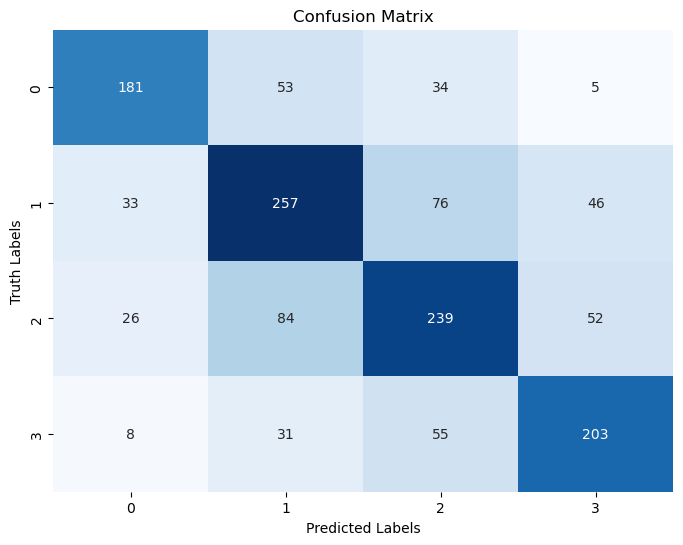

In [70]:
conf_matrix = confusion_matrix(y_test, y_classes)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Truth Labels')
plt.title('Confusion Matrix')
plt.show()

# Implementation of Simple RNN

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import numpy as np



num_classes = np.max(y_train) + 1 


RNN_model = Sequential(name="Simple_RNN")
RNN_model.add(SimpleRNN(128,
                        activation='tanh', input_shape=(X_train.shape[1], 1))),  # Input shape is adjusted to the length o f each sequence and 1 for the single feature
RNN_model.add(Dense(64,activation='tanh')) , 

RNN_model.add(Dense(num_classes, activation='softmax'))


print(RNN_model.summary())


RNN_model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer='adam',
    metrics=['accuracy']
)


history = RNN_model.fit(X_train, y_train,
                        batch_size=64,
                        epochs=5,
                        verbose=1)


print()
print("Simple_RNN Score---> ", RNN_model.evaluate(X_test, y_test, verbose=0))


Model: "Simple_RNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 128)               16640     
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 4)                 260       
                                                                 
Total params: 25156 (98.27 KB)
Trainable params: 25156 (98.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/5
65/65 [==============================] - 23s 336ms/step - loss: 1.2802 - accuracy: 0.3693
Epoch 2/5
65/65 [==============================] - 22s 343ms/step - loss: 1.2471 - accuracy: 0.3836
Epoch 3/5
65/65 [==============================] - 22s 340ms/step - loss: 1.238

44/44 [==============================] - 4s 82ms/step


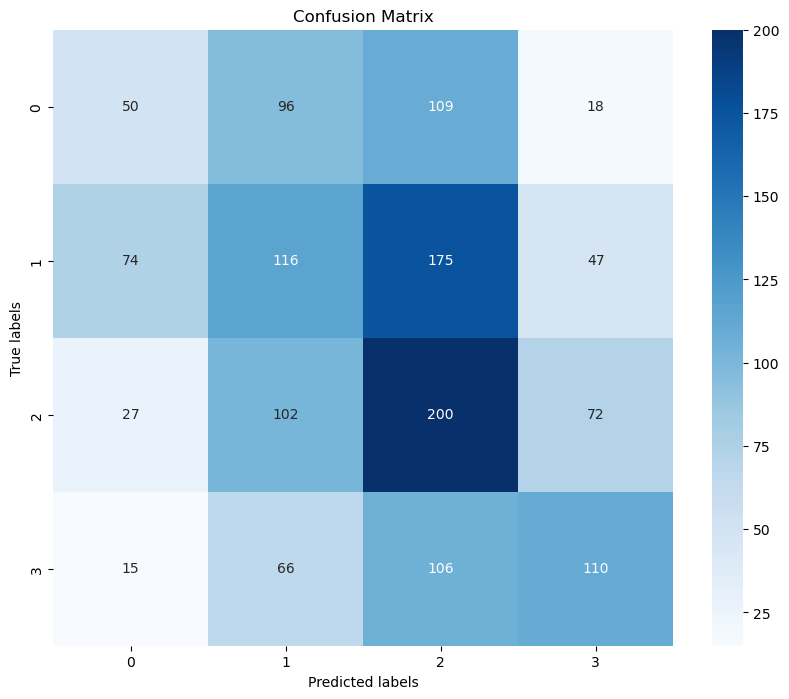

In [67]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
y_pred = np.argmax(RNN_model.predict(X_test), axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Implementation of GRU

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
import numpy as np


num_classes = np.max(y_train) + 1 

# Reshaping input data to include the timestep dimension

X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped=X_test.reshape((X_test.shape[0],X_test.shape[1],1))

# Defining the GRU model
gru_model = Sequential(name="GRU_Model")
gru_model.add(GRU(128,
                  activation='tanh',
                  return_sequences=False,
                  input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))  

gru_model.add(Dense(num_classes, activation='softmax'))

# Printing the Summary
print(gru_model.summary())

# Compiling the model
gru_model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer='adam',
    metrics=['accuracy']
)

# Training the GRU model
history2 = gru_model.fit(X_train_reshaped, y_train,
                         batch_size=64,
                         epochs=5,
                         verbose=1)

# Printing model score on test data
print()
print("GRU model Score---> ", gru_model.evaluate(X_test_reshaped, y_test, verbose=0))


Model: "GRU_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 128)               50304     
                                                                 
 dense_16 (Dense)            (None, 4)                 516       
                                                                 
Total params: 50820 (198.52 KB)
Trainable params: 50820 (198.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/5
65/65 [==============================] - 333s 5s/step - loss: 1.3192 - accuracy: 0.3544
Epoch 2/5
65/65 [==============================] - 316s 5s/step - loss: 1.2404 - accuracy: 0.3848
Epoch 3/5
65/65 [==============================] - 325s 5s/step - loss: 1.2307 - accuracy: 0.3939
Epoch 4/5
65/65 [==============================] - 322s 5s/step - loss: 1.2298 - accuracy: 0.3925
Epoch 5/5
65/65 [=

# Implementation of LSTM

In [46]:
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential
import numpy as np



num_classes = np.max(y_train) + 1 


X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped=X_test.reshape((X_test.shape[0],X_test.shape[1],1))
# Defining the LSTM model
lstm_model = Sequential(name="LSTM_Model")
lstm_model.add(LSTM(128, activation='relu', return_sequences=False, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
lstm_model.add(Dense(num_classes, activation='softmax'))  # Adjust output units to match the number of classes

# Printing Model Summary
print(lstm_model.summary())

# Compile the model
lstm_model.compile(
    loss="sparse_categorical_crossentropy",  # Use sparse categorical cross-entropy for integer labels
    optimizer='adam',
    metrics=['accuracy']
)

# Training the model
history = lstm_model.fit(X_train_reshaped, y_train,
                         batch_size=64,
                         epochs=5,
                         verbose=2)

# Evaluating the model on test data
print()
print("LSTM model Score---> ", lstm_model.evaluate(X_test_reshaped, y_test, verbose=0))


Model: "LSTM_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 128)               66560     
                                                                 
 dense_2 (Dense)             (None, 4)                 516       
                                                                 
Total params: 67076 (262.02 KB)
Trainable params: 67076 (262.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/5
65/65 - 178s - loss: 14273511424.0000 - accuracy: 0.3353 - 178s/epoch - 3s/step
Epoch 2/5
65/65 - 150s - loss: 14.1102 - accuracy: 0.3358 - 150s/epoch - 2s/step
Epoch 3/5
65/65 - 146s - loss: 1.3559 - accuracy: 0.3358 - 146s/epoch - 2s/step
Epoch 4/5
65/65 - 164s - loss: 1.3532 - accuracy: 0.3370 - 164s/epoch - 3s/step
Epoch 5/5
65/65 - 180s - loss: 1.3514 - accuracy: 0.3385 - 180s/epoch - 3s/ste

# Implementation of bidirectional network

In [24]:
from keras.models import Model
from keras.layers import Input, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential

num_classes = np.max(y_train) + 1 


X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


# Defining Bidirectional LSTM model
bi_lstm_model = Sequential(name="Bidirectional_LSTM")

bi_lstm_model.add(Bidirectional(LSTM(128,
                                     activation='tanh',
                                     return_sequences=False,input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape))))
bi_lstm_model.add(Dense(num_classes, activation='softmax'))
bi_lstm_model.build(input_shape=(None, X_train_reshaped.shape[1], X_train_reshaped.shape[2]))
 
# Printing model summary
print(bi_lstm_model.summary())
 
# Compiling model summary
bi_lstm_model.compile(
  loss="sparse_categorical_crossentropy",
  optimizer='adam',
  metrics=['accuracy']
)
 
# Training the model
history4 = bi_lstm_model.fit(X_train_reshaped, y_train,
                             batch_size=64,
                             epochs=5,
                             verbose=2)
                             
 
# Printing model score on test data
print()
print("Bidirectional LSTM model Score---> ",
      bi_lstm_model.evaluate(X_test_reshaped, y_test, verbose=0))

Model: "Bidirectional_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_7 (Bidirecti  (None, 256)               133120    
 onal)                                                           
                                                                 
 dense_7 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 134148 (524.02 KB)
Trainable params: 134148 (524.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/5
65/65 - 1262s - loss: 1.2055 - accuracy: 0.4253 - 1262s/epoch - 19s/step
Epoch 2/5
65/65 - 1516s - loss: 1.1398 - accuracy: 0.4759 - 1516s/epoch - 23s/step
Epoch 3/5
65/65 - 1511s - loss: 1.1240 - accuracy: 0.4851 - 1511s/epoch - 23s/step
Epoch 4/5
65/65 - 1361s - loss: 1.1133 - accuracy: 0.4930 - 1361s/epoch - 21s/step
E

Epoch 1/10
519/519 [==============================] - 4s 7ms/step - loss: 0.7416 - accuracy: 0.7671 - val_loss: 1.2384 - val_accuracy: 0.6110
Epoch 2/10
519/519 [==============================] - 3s 5ms/step - loss: 0.3023 - accuracy: 0.8860 - val_loss: 1.5128 - val_accuracy: 0.6146
Epoch 3/10
519/519 [==============================] - 2s 5ms/step - loss: 0.1591 - accuracy: 0.9424 - val_loss: 1.8481 - val_accuracy: 0.5886
Epoch 4/10
519/519 [==============================] - 2s 4ms/step - loss: 0.1076 - accuracy: 0.9619 - val_loss: 1.7640 - val_accuracy: 0.6255
Epoch 5/10
519/519 [==============================] - 2s 4ms/step - loss: 0.0847 - accuracy: 0.9725 - val_loss: 2.0700 - val_accuracy: 0.5980
Epoch 6/10
519/519 [==============================] - 2s 3ms/step - loss: 0.1146 - accuracy: 0.9658 - val_loss: 1.9862 - val_accuracy: 0.6218
Epoch 7/10
519/519 [==============================] - 2s 3ms/step - loss: 0.1385 - accuracy: 0.9511 - val_loss: 1.9356 - val_accuracy: 0.6283
Epoch 

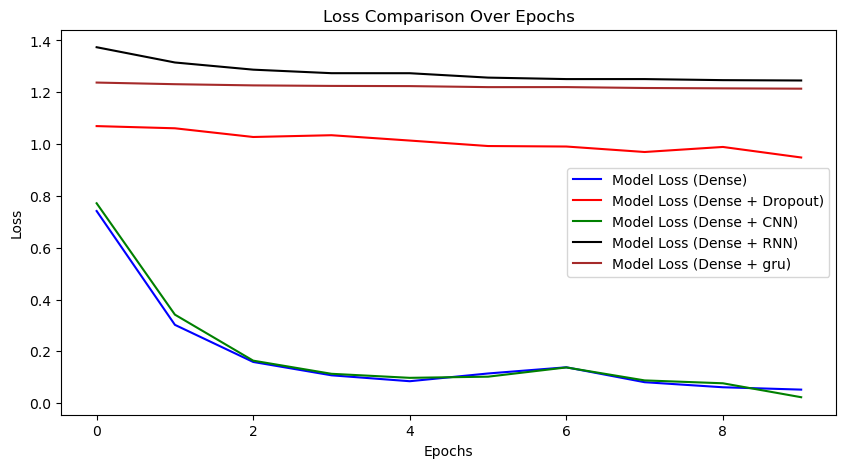

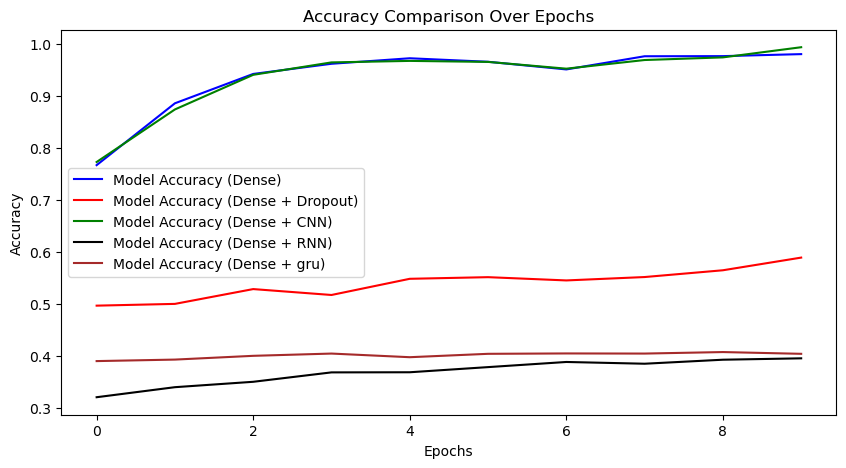

In [62]:
import matplotlib.pyplot as plt

# Training the first model
history_models = models.fit(X_train, y_train, epochs=10, batch_size=8, validation_data=(X_test, y_test))
# Training the model


                             
                            
# Training the second model
history_modeld = modeld.fit(X_train, y_train, epochs=10, batch_size=8, validation_data=(X_test, y_test))
history_model = model.fit(X_train, y_train, epochs=10, batch_size=8, validation_data=(X_test, y_test))
history = RNN_model.fit(X_train, y_train,epochs=10,batch_size=8,validation_data=(X_test,y_test))
history2 = gru_model.fit(X_train_reshaped, y_train,epochs=10,batch_size=8,
                         validation_data=(X_test_reshaped,y_test))
                         
                         


                        

                        
                        


                         
                         
# Plotting loss for both models
plt.figure(figsize=(10, 5))
plt.plot(history_models.history['loss'], label='Model Loss (Dense)', color='blue')
plt.plot(history_modeld.history['loss'], label='Model Loss (Dense + Dropout)', color='red')
plt.plot(history_model.history['loss'], label='Model Loss (Dense + CNN)', color='green')
plt.plot(history.history['loss'], label='Model Loss (Dense + RNN)', color='black')
plt.plot(history2.history['loss'], label='Model Loss (Dense + gru)', color='brown')


plt.title('Loss Comparison Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting accuracy for both models
plt.figure(figsize=(10, 5))
plt.plot(history_models.history['accuracy'], label='Model Accuracy (Dense)', color='blue')
plt.plot(history_modeld.history['accuracy'], label='Model Accuracy (Dense + Dropout)', color='red')
plt.plot(history_model.history['accuracy'], label='Model Accuracy (Dense + CNN)', color='green') 
plt.plot(history.history['accuracy'], label='Model Accuracy (Dense + RNN)', color='black') 
plt.plot(history2.history['accuracy'], label='Model Accuracy (Dense + gru)', color='brown') 



plt.title('Accuracy Comparison Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
